#**Fraud detection Prediction Model**
Experts predict online credit card fraud to soar to a whopping $32 billion in 2020.
Coca-Cola - (2 billions)
Berkshire Hathway - (24 Billions)
JP Morgan Chase - (23.5 billion)


**Would Machine Learning & AI constitute great allies in this battle?**

Investment in technology for fraud detection has increased over the years so this shouldn’t be a surprise, but this brings us a problem: **imbalanced data.**

In [ ]:
# Let's start by Importing the data file
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
  
  
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://drive.google.com/file/d/1xW1lj5YQdF809pLAkVjNd4dTFA_CVEeq/view?usp=sharing'

import pandas as pd
  
# to get the id part of the file
id = link.split("/")[-2]
  
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('creditcard.csv')  
  
df = pd.read_csv('creditcard.csv')
print(df)

            Time         V1         V2  ...       V28  Amount  Class
0            0.0  -1.359807  -0.072781  ... -0.021053  149.62      0
1            0.0   1.191857   0.266151  ...  0.014724    2.69      0
2            1.0  -1.358354  -1.340163  ... -0.059752  378.66      0
3            1.0  -0.966272  -0.185226  ...  0.061458  123.50      0
4            2.0  -1.158233   0.877737  ...  0.215153   69.99      0
...          ...        ...        ...  ...       ...     ...    ...
284802  172786.0 -11.881118  10.071785  ...  0.823731    0.77      0
284803  172787.0  -0.732789  -0.055080  ... -0.053527   24.79      0
284804  172788.0   1.919565  -0.301254  ... -0.026561   67.88      0
284805  172788.0  -0.240440   0.530483  ...  0.104533   10.00      0
284806  172792.0  -0.533413  -0.189733  ...  0.013649  217.00      0

[284807 rows x 31 columns]


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

In [ ]:
df.shape

(284807, 31)

In [ ]:
#splitting data inttoo features and target 
X = df.drop(['Class'],axis=1)
y = df['Class']

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

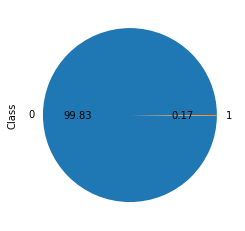

In [ ]:
y.value_counts().plot.pie(autopct = '%.2f')

As we can see from above output, how imbalanced the data is.
From the pie chart, only 0.17% of data points are classified as fraudulent

The most **fast, straightforward** way to proceed in this case would be predicting that 100% of all the transactions are not fraudulent. Accuracy in this case would be 99% . Not bad, right?

Would this **“model”** be correct and fault proof regardless of characteristics from all your future transactions?

Prediction would have *no value*. And one of the most important missions of a Data Scientist is **creating business value out of data**.

In [ ]:
model = XGBClassifier(n_estimator = 100, learning_rate=0.05, n_jobs=4)

model.fit(X_train,y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)],verbose = False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimator=100,
              n_estimators=100, n_jobs=4, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [ ]:
preds = model.predict(X_test)
print(classification_report(y_test, preds))
print(roc_auc_score(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.86      0.73      0.79       136

    accuracy                           1.00     85443
   macro avg       0.93      0.86      0.89     85443
weighted avg       1.00      1.00      1.00     85443

0.8638768092956995


# Dealing with imbalanced data
I am gonna compare the classsification report of all the methods below
*   Oversampling — SMOTE
*   Undersampling — RandomUnderSampler
*   Combined Class Methods — SMOTE + ENN

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

re_smote = SMOTE()
steps = [('re_smote', SMOTE()), ('model', model)]
pipeline = Pipeline(steps=steps)

pipeline.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Pipeline(memory=None,
         steps=[('re_smote',
                 SMOTE(k_neighbors=5, kind='deprecated',
                       m_neighbors='deprecated', n_jobs=1,
                       out_step='deprecated', random_state=None, ratio=None,
                       sampling_strategy='auto', svm_estimator='deprecated')),
                ('model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.05,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=1, missing=None,
                               n_estimator=100, n_estimators=100, n_jobs=4,
                               nthread=None, objective='binary:logistic',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, seed=None, silent=None,
        

In [ ]:
def score():
    preds = pipeline.predict(X_test.values)
    print(classification_report(y_test, preds))
    print(roc_auc_score(y_test, preds))
score()

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85307
           1       0.04      0.92      0.08       136

    accuracy                           0.96     85443
   macro avg       0.52      0.94      0.53     85443
weighted avg       1.00      0.96      0.98     85443

0.941775992108778


Random undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy = 1)

steps = [('rus', rus), ('model', model)]
pipeline = Pipeline(steps=steps)

pipeline.fit(X_train, y_train)

score()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85307
           1       0.03      0.90      0.06       136

    accuracy                           0.96     85443
   macro avg       0.52      0.93      0.52     85443
weighted avg       1.00      0.96      0.98     85443

0.9311114821278715


In [ ]:
#To be continued